# Proyecto 1- Parte final (Core)
Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

### Objetivo: 
Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

### Instrucciones Detalladas:
Parte 1: Exploración y Visualización de Datos (EDA)
- Carga y Exploración Inicial de Datos:Cargar el dataset y revisar su estructura básica. Describir las variables y su distribución. Identificar y tratar valores nulos y outliers.
- Análisis de Correlación: Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.
- Visualización de Datos: Crear subplots para comparar diferentes variables clave. Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

Parte 2: Preprocesamiento de Datos
- Transformación de Columnas: Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas. Realizar codificación de variables categóricas y escalado de variables numéricas.
- Pipelines: Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

Parte 3: Benchmarking de Técnicas de Machine Learning
- Selección de Modelos: Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM). Utilizar validación cruzada para evaluar el rendimiento de los modelos.
- Comparación de Modelos: Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC. Seleccionar el mejor modelo basado en las métricas obtenidas.

Parte 4: Análisis de Métricas
- Informe de Clasificación: Generar un informe de clasificación para los modelos evaluados. Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.
- Curva ROC y AUC: Crear y visualizar la curva ROC para los modelos de clasificación binaria. Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

Parte 5: Presentación de Resultados
- Preparación de la Presentación (One-Page en PPT): Introducción y objetivos del proyecto. Descripción del conjunto de datos. Principales análisis y hallazgos. Visualizaciones clave con explicación. Conclusiones y recomendaciones.
- Subida a GitHub: Subir todo el código y los resultados a una nueva rama en el repositorio de GitHub. Generar un Pull Request (PR) para revisión y aprobación. Crear un tag para esta versión del proyecto (v1.0.0) y liberar la versión.


In [45]:
# Esconder warnings
import warnings
warnings.filterwarnings('ignore')

# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score




# Cargar el dataset
path = '../data/retail_sales_dataset.csv'
df = pd.read_csv(path)
# Imprimir los prmeros valores
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Exploración inicial del dataset

In [2]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Preprocesado de datos

In [10]:
# Convertis la columna Date de object a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificar si hay valores nulos
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Exploracion de los datos

                 count                           mean                  min  \
Transaction ID  1000.0                          500.5                  1.0   
Date              1000  2023-07-03 00:25:55.200000256  2023-01-01 00:00:00   
Age             1000.0                         41.392                 18.0   
Quantity        1000.0                          2.514                  1.0   
Price per Unit  1000.0                         179.89                 25.0   
Total Amount    1000.0                          456.0                 25.0   

                                25%                  50%                  75%  \
Transaction ID               250.75                500.5               750.25   
Date            2023-04-08 00:00:00  2023-06-29 12:00:00  2023-10-04 00:00:00   
Age                            29.0                 42.0                 53.0   
Quantity                        1.0                  3.0                  4.0   
Price per Unit                 30.0             

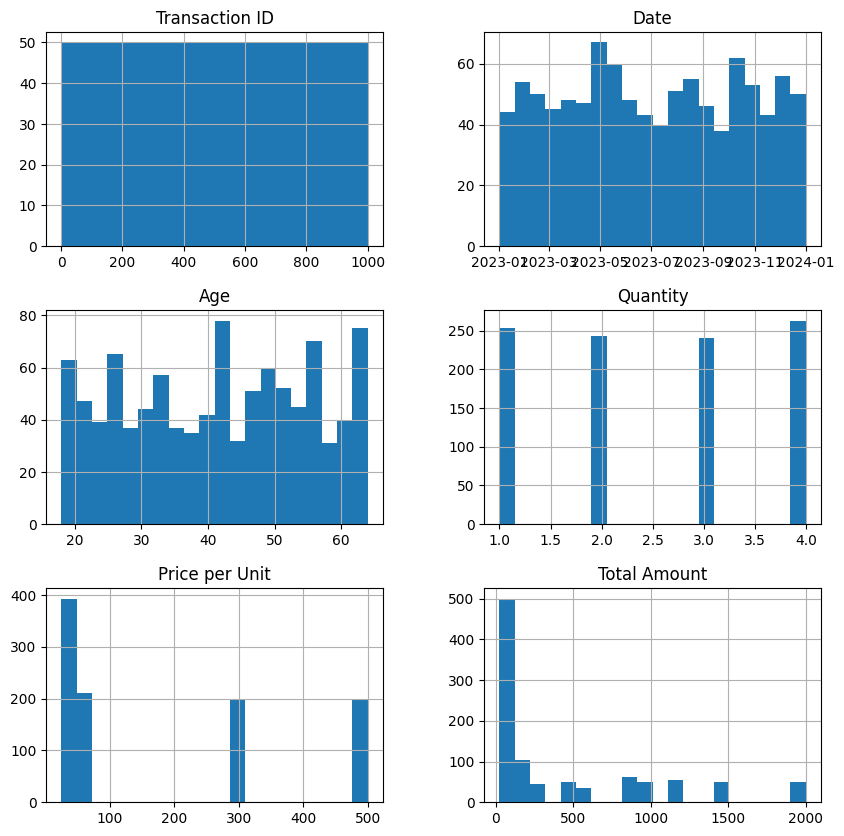

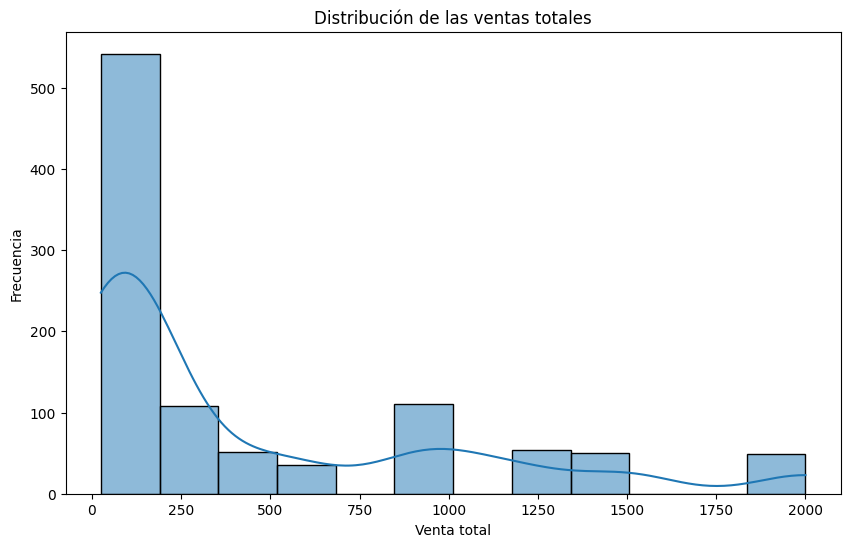

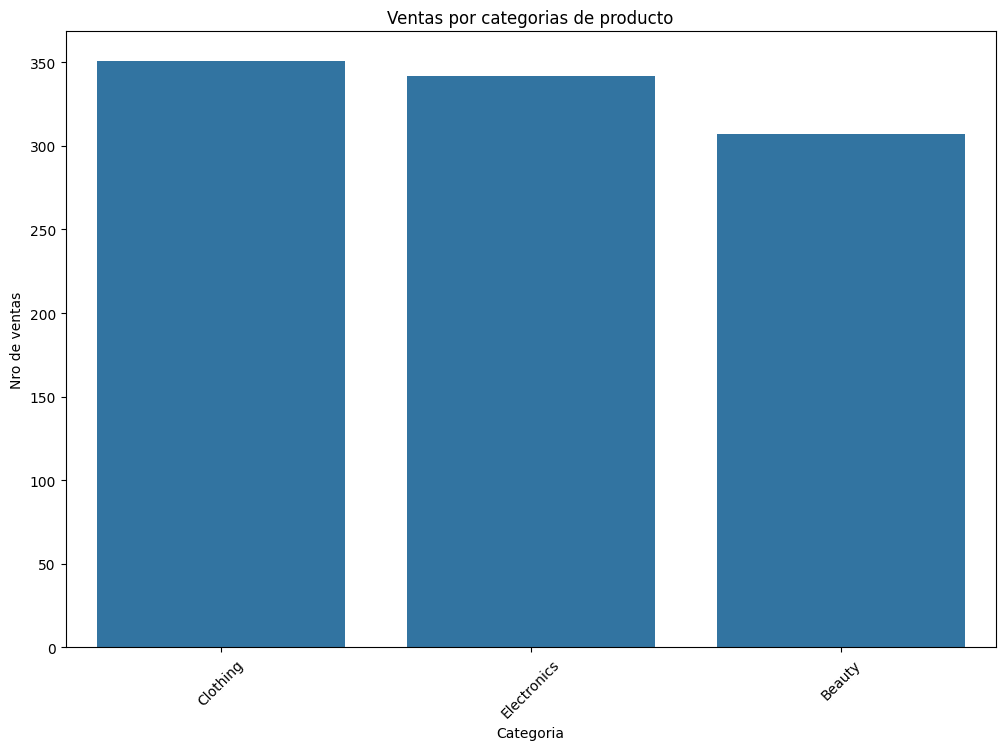

In [12]:
# Resumen estadístico
print(df.describe().T)

# Creamos un histograma la para distribucion de los datos
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Distribución de la columna total amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Amount'], kde=True)
plt.title('Distribución de las ventas totales')
plt.xlabel('Venta total')
plt.ylabel('Frecuencia')
plt.show()

# Ventas por categoria de producto
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Ventas por categorias de producto')
plt.xlabel('Categoria')
plt.ylabel('Nro de ventas')
plt.xticks(rotation=45)
plt.show()

### Analisis de correlacion

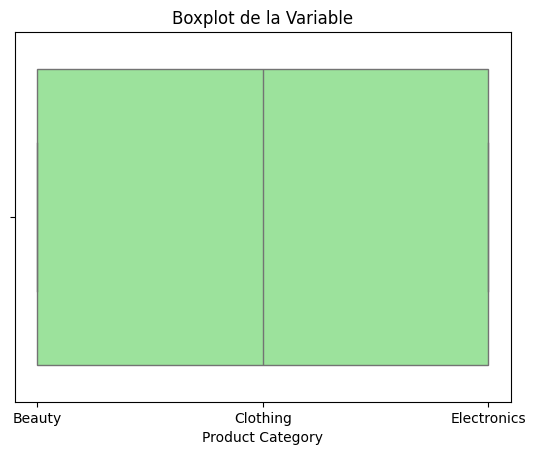

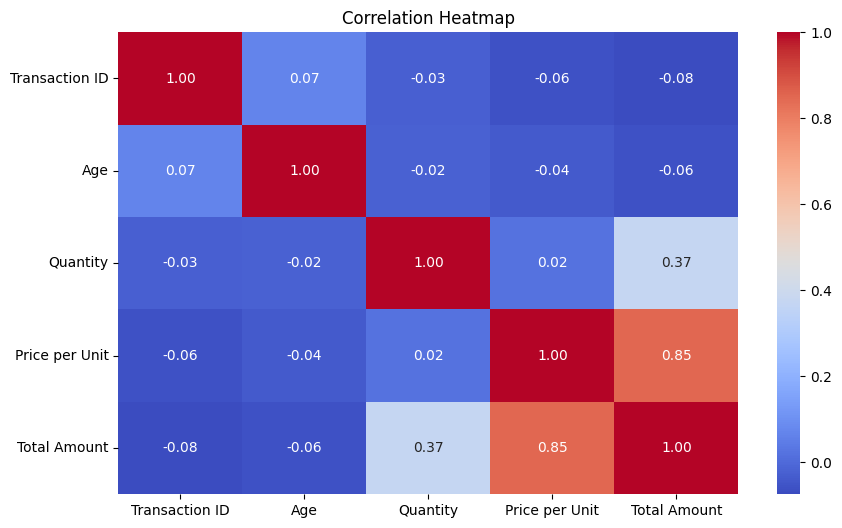

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Preprocesamiento de datos

In [17]:
# Selección de columnas categóricas y numéricas
categorical_features = ['Gender', 'Product Category']
numerical_features = ['Age', 'Quantity', 'Price per Unit']

# Dividir en características (X) y variable objetivo (Y)
y = df['Total Amount']
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID', 'Total Amount'])


In [18]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el transformador para columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Escalado de variables numéricas
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Codificación de categóricas
    ]
)
# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((800, 6), (200, 6))

### Entrenar modelos

In [21]:
# Lista de modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Evaluación de modelos utilizando validación cruzada
model_scores = {}

for model_name, model in models.items():
    # Realizar validación cruzada (5-fold)
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='r2')
    model_scores[model_name] = np.mean(scores)

model_scores

{'Linear Regression': 0.8447308289299768,
 'KNN': 0.9698667210572692,
 'Decision Tree': 1.0,
 'Random Forest': 1.0}

### Observaciones
Los modelos de Árbol de Decisión y Random Forest alcanzan un r2 perfecto, sugiriendo que están capturando completamente las relaciones en los datos.
El modelo KNN también tiene un desempeño alto.
La Regresión Lineal muestra un rendimiento razonable pero menor comparado con los modelos no lineales.

### Metricas del ramdom forest

In [47]:
# Entrenar el modelo Random Forest con los datos de entrenamiento
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_processed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test_processed)
y_true = y_test
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Cambia 'weighted' según sea necesario
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
MSE: 0.0
MAE: 0.0
R^2: 1.0


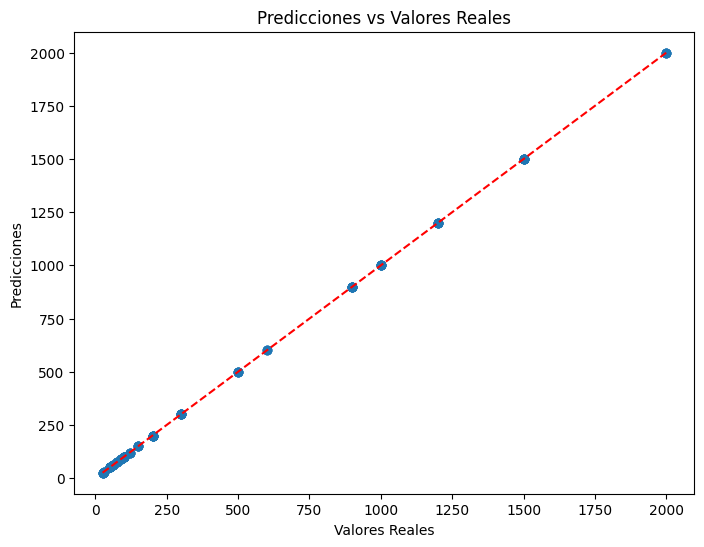

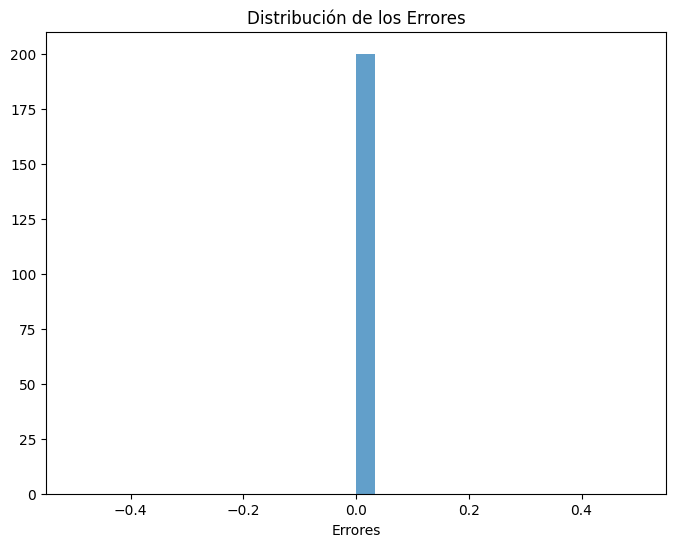

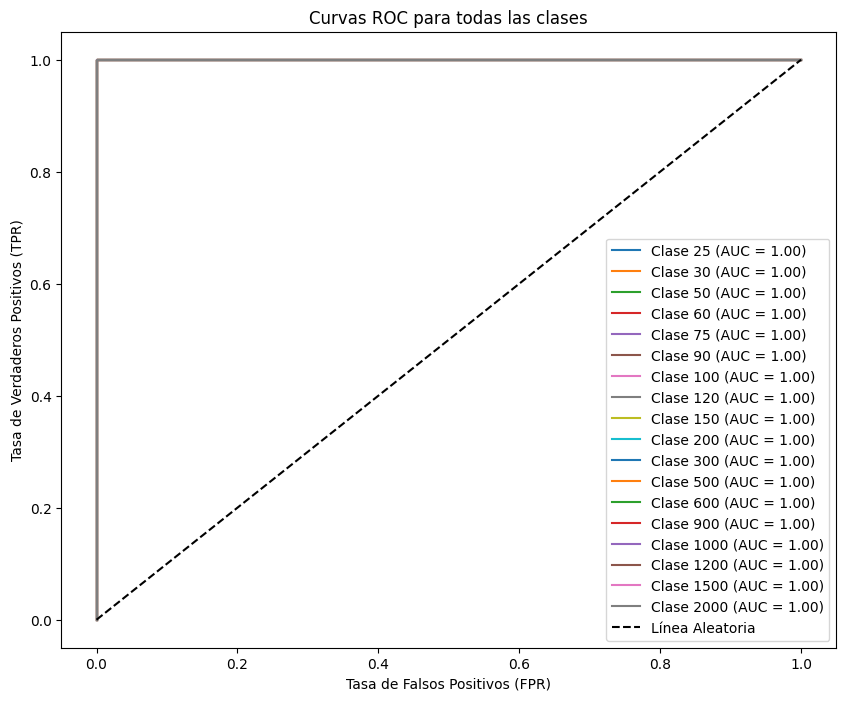

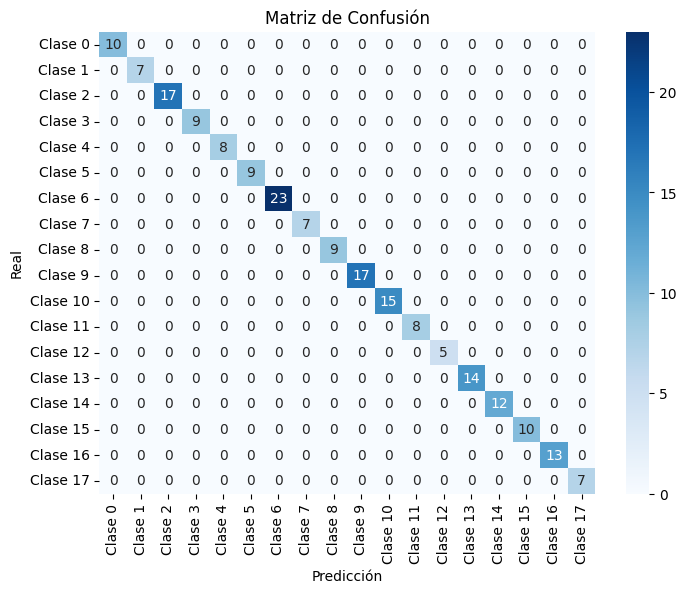

              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        10
     Clase 1       1.00      1.00      1.00         7
     Clase 2       1.00      1.00      1.00        17
     Clase 3       1.00      1.00      1.00         9
     Clase 4       1.00      1.00      1.00         8
     Clase 5       1.00      1.00      1.00         9
     Clase 6       1.00      1.00      1.00        23
     Clase 7       1.00      1.00      1.00         7
     Clase 8       1.00      1.00      1.00         9
     Clase 9       1.00      1.00      1.00        17
    Clase 10       1.00      1.00      1.00        15
    Clase 11       1.00      1.00      1.00         8
    Clase 12       1.00      1.00      1.00         5
    Clase 13       1.00      1.00      1.00        14
    Clase 14       1.00      1.00      1.00        12
    Clase 15       1.00      1.00      1.00        10
    Clase 16       1.00      1.00      1.00        13
    Clase 17       1.00    

In [52]:
#  Gráfico de Predicción vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.savefig('../reports/Prediccion_vs_DatosReales.png')
plt.show()

# Histograma de errores
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7)
plt.xlabel('Errores')
plt.title('Distribución de los Errores')
plt.savefig('../reports/Distribucion_Errores.png')
plt.show()

# Probabilidades predichas para la clase positiva
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas para calcular ROC por clase
classes = sorted(y_test.unique())  # Asegúrate de tener las clases ordenadas
y_test_binarized = label_binarize(y_test, classes=classes)

# Calcular la curva ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], rf_model.predict_proba(X_test_processed)[:, i])
    roc_auc[class_label] = roc_auc_score(y_test_binarized[:, i], rf_model.predict_proba(X_test_processed)[:, i])

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Clase {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Línea Aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para todas las clases')
plt.legend(loc='lower right')
plt.savefig('../reports/Curvas_ROC_Multiclase.png')
plt.show()


from sklearn.metrics import confusion_matrix, classification_report
# Generar nombres de clases dinámicamente
target_names = [f'Clase {i}' for i in range(len(y_test.unique()))]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.savefig('../reports/MatrizConfusion.png')
plt.show()

# Informe de Clasificación
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)
